In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns


In [3]:
# Récupérer les données
data1 = pd.read_csv("input/earthquake_features.csv")
data2 = pd.read_csv("input/earthquake_y.csv")

# Merge des données
raw_data = pd.merge(data1, data2, on=['building_id'], how='left')

# Afficher les 5 premières lignes
# raw_data.head(5)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:

# Supprimer les colonnes inutiles
cols_to_drop = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
                'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 
                'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 
                'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
                'has_secondary_use_use_police', 'has_secondary_use_other', 'legal_ownership_status', 
                'count_families']
data = raw_data.drop(cols_to_drop, axis=1)

# Supprimer temporairement les colonnes qualitatives
# tmp_cols_to_drop = ["land_surface_condition",
#                     "foundation_type",
#                     "roof_type",
#                     "ground_floor_type",
#                     "other_floor_type",
#                     "position",
#                     "plan_configuration",
#                     ]

# data = data.drop(tmp_cols_to_drop, axis=1)

# Afficher les 5 premières lignes
data.head(50)

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,802906,2,30,6,5,t,r,n,f,q,...,0,0,0,0,0,0,0,0,0,3
1,28830,2,10,8,7,o,r,n,x,q,...,0,0,0,0,0,0,0,0,0,2
2,94947,2,10,5,5,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3
3,590882,2,10,6,5,t,r,n,f,x,...,0,0,0,0,1,1,0,0,0,2
4,201944,3,30,8,9,t,r,n,f,x,...,0,0,0,0,0,0,0,0,0,3
5,333020,2,10,9,5,t,r,n,f,q,...,0,0,0,0,0,0,0,0,0,2
6,728451,2,25,3,4,n,r,n,x,q,...,0,0,0,0,0,0,0,0,0,3
7,475515,2,0,8,6,t,w,q,v,x,...,0,0,0,1,1,0,0,0,0,1
8,441126,2,15,8,6,t,r,q,f,q,...,0,0,0,0,1,0,0,0,0,2
9,989500,1,0,13,4,t,i,n,v,j,...,0,0,0,1,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   count_floors_pre_eq                     260601 non-null  int64 
 2   age                                     260601 non-null  int64 
 3   area_percentage                         260601 non-null  int64 
 4   height_percentage                       260601 non-null  int64 
 5   land_surface_condition                  260601 non-null  object
 6   foundation_type                         260601 non-null  object
 7   roof_type                               260601 non-null  object
 8   ground_floor_type                       260601 non-null  object
 9   other_floor_type                        260601 non-null  object
 10  position                                260601 non-null 

In [6]:
# Détecter valeurs manquantes
print(data.isnull().sum().sort_values(ascending=False))

building_id                               0
count_floors_pre_eq                       0
has_superstructure_other                  0
has_superstructure_rc_engineered          0
has_superstructure_rc_non_engineered      0
has_superstructure_bamboo                 0
has_superstructure_timber                 0
has_superstructure_cement_mortar_brick    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_stone    0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_stone       0
has_superstructure_adobe_mud              0
plan_configuration                        0
position                                  0
other_floor_type                          0
ground_floor_type                         0
roof_type                                 0
foundation_type                           0
land_surface_condition                    0
height_percentage                         0
area_percentage                           0
age                             

In [7]:
# convertir les colonnes
# object_columns = data.describe(include="object").columns
data_copy = data.copy()
data_copy.to_csv('output/full.csv', encoding='utf-8')

def convert_cols(data, colums, enums, type=float):
    for x in range(len(colums)):
        data[colums[x]] = data[colums[x]].replace(enums[x]).astype(type)
    return data

data_copy = convert_cols(data_copy, ["land_surface_condition",
                                                  "foundation_type",
                                                    "roof_type",
                                                    "ground_floor_type",
                                                    "other_floor_type",
                                                    "position",
                                                    "plan_configuration",
                                                    ], [
    {
        "n": "1",
        "o": "2",
        "t": "3",

    },
    {
        "h": "1",
        "i": "2",
        "r": "3",
        "u": "4",
        "w": "5"
    },
    {
        "n": "1",
        "q": "2",
        "x": "3",

    },
    {
        "f": "1",
        "m": "2",
        "v": "3",
        "x": "4",
        "z": "5"
    },
    {
        "j": "1",
        "q": "2",
        "s": "3",
        "x": "4"
    },
    {
        "j": "1",
        "o": "2",
        "s": "3",
        "t": "4"
    },
    {
        "a": "1",
        "c": "2",
        "d": "3",
        "f": "4",
        "m": "5",
        "n": "6",
        "o": "7",
        "q": "8",
        "s": "9",
        "u": "10",
    }
], type="int64")


# data_copy["week_start_date"] = pd.to_datetime(data_copy["week_start_date"])   // to convert to timestamp

data_copy.head(10)

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,802906,2,30,6,5,3,3,1,1,2,...,0,0,0,0,0,0,0,0,0,3
1,28830,2,10,8,7,2,3,1,4,2,...,0,0,0,0,0,0,0,0,0,2
2,94947,2,10,5,5,3,3,1,1,4,...,0,0,0,0,0,0,0,0,0,3
3,590882,2,10,6,5,3,3,1,1,4,...,0,0,0,0,1,1,0,0,0,2
4,201944,3,30,8,9,3,3,1,1,4,...,0,0,0,0,0,0,0,0,0,3
5,333020,2,10,9,5,3,3,1,1,2,...,0,0,0,0,0,0,0,0,0,2
6,728451,2,25,3,4,1,3,1,4,2,...,0,0,0,0,0,0,0,0,0,3
7,475515,2,0,8,6,3,5,2,3,4,...,0,0,0,1,1,0,0,0,0,1
8,441126,2,15,8,6,3,3,2,1,2,...,0,0,0,0,1,0,0,0,0,2
9,989500,1,0,13,4,3,2,1,3,1,...,0,0,0,1,0,0,0,0,0,1


In [8]:
# Définir y et X
X = data_copy.drop(["damage_grade"], axis=1)
y = data_copy["damage_grade"]
# y = y.fillna(y.mean())

y.describe()

# data_copy.to_csv('output/cleaned_data.csv', encoding='utf-8')

count    260601.000000
mean          2.238272
std           0.611814
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: damage_grade, dtype: float64

In [9]:
# Info sur les données
print(X.shape)
X.info()
X.describe()

(260601, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   count_floors_pre_eq                     260601 non-null  int64
 2   age                                     260601 non-null  int64
 3   area_percentage                         260601 non-null  int64
 4   height_percentage                       260601 non-null  int64
 5   land_surface_condition                  260601 non-null  int64
 6   foundation_type                         260601 non-null  int64
 7   roof_type                               260601 non-null  int64
 8   ground_floor_type                       260601 non-null  int64
 9   other_floor_type                        260601 non-null  int64
 10  position                                260601 non-null

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.129723,26.535029,8.018051,5.434365,2.695427,3.119036,1.360482,1.492481,2.226711,...,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985
std,3.045450e+05,0.727665,73.565937,4.392231,1.918418,0.696040,0.579154,0.595595,1.028436,0.902518,...,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491
min,4.000000e+00,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,10.000000,5.000000,4.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,15.000000,7.000000,5.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,2.000000,30.000000,9.000000,6.000000,3.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,9.000000,995.000000,100.000000,32.000000,3.000000,5.000000,3.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Detection des valeurs manquantes

# # nombre de valeurs manquantes
# print(X.isnull().sum().sort_values(ascending=False))
# # Proportion de valeurs manquantes
# X.isnull().mean().sort_values(ascending=False)


In [11]:
# # 0 pour supprimer toutes les lignes contenant des valeurs manquantes
# data_supp_lignes = data_copy.dropna(axis=0)

# print(data_supp_lignes.shape)

# 1 pour supprimer les colonnes contenant des valeurs manquantes

# data_supp_col = data_copy.dropna(axis=1)

# print(data_supp_col.shape)

# Remplacer les valeurs manquantes par la moyenne, le mode ou la médiane
# X = X.fillna(X.mean())


from mlxtend.data import iris_data
from mlxtend.plotting import plot_pca_correlation_graph
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt



In [12]:
# X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended
# X_tmp = X.values
# feature_names = X_norm.select_dtypes(include='int64').columns


# figure, correlation_matrix = plot_pca_correlation_graph(X_norm, 
#                                                         feature_names,
#                                                         dimensions=(1, 2),
#                                                         figure_axis_size=10)




In [13]:
# pca = PCA(n_components=4)

# principalComponents = pca.fit_transform(X_norm)

# principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4'])
# principalDataframe

In [14]:
# ## Recueil des informations par axe
# percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# percent_variance

In [15]:
# columns = ['PC1', 'PC2', 'PC3', 'PC4']
# plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
# plt.ylabel('Percentate of Variance Explained')
# plt.xlabel('Principal Component')
# plt.title('PCA Scree Plot')
# plt.show()

In [16]:
X.head()
corr = X.corr()

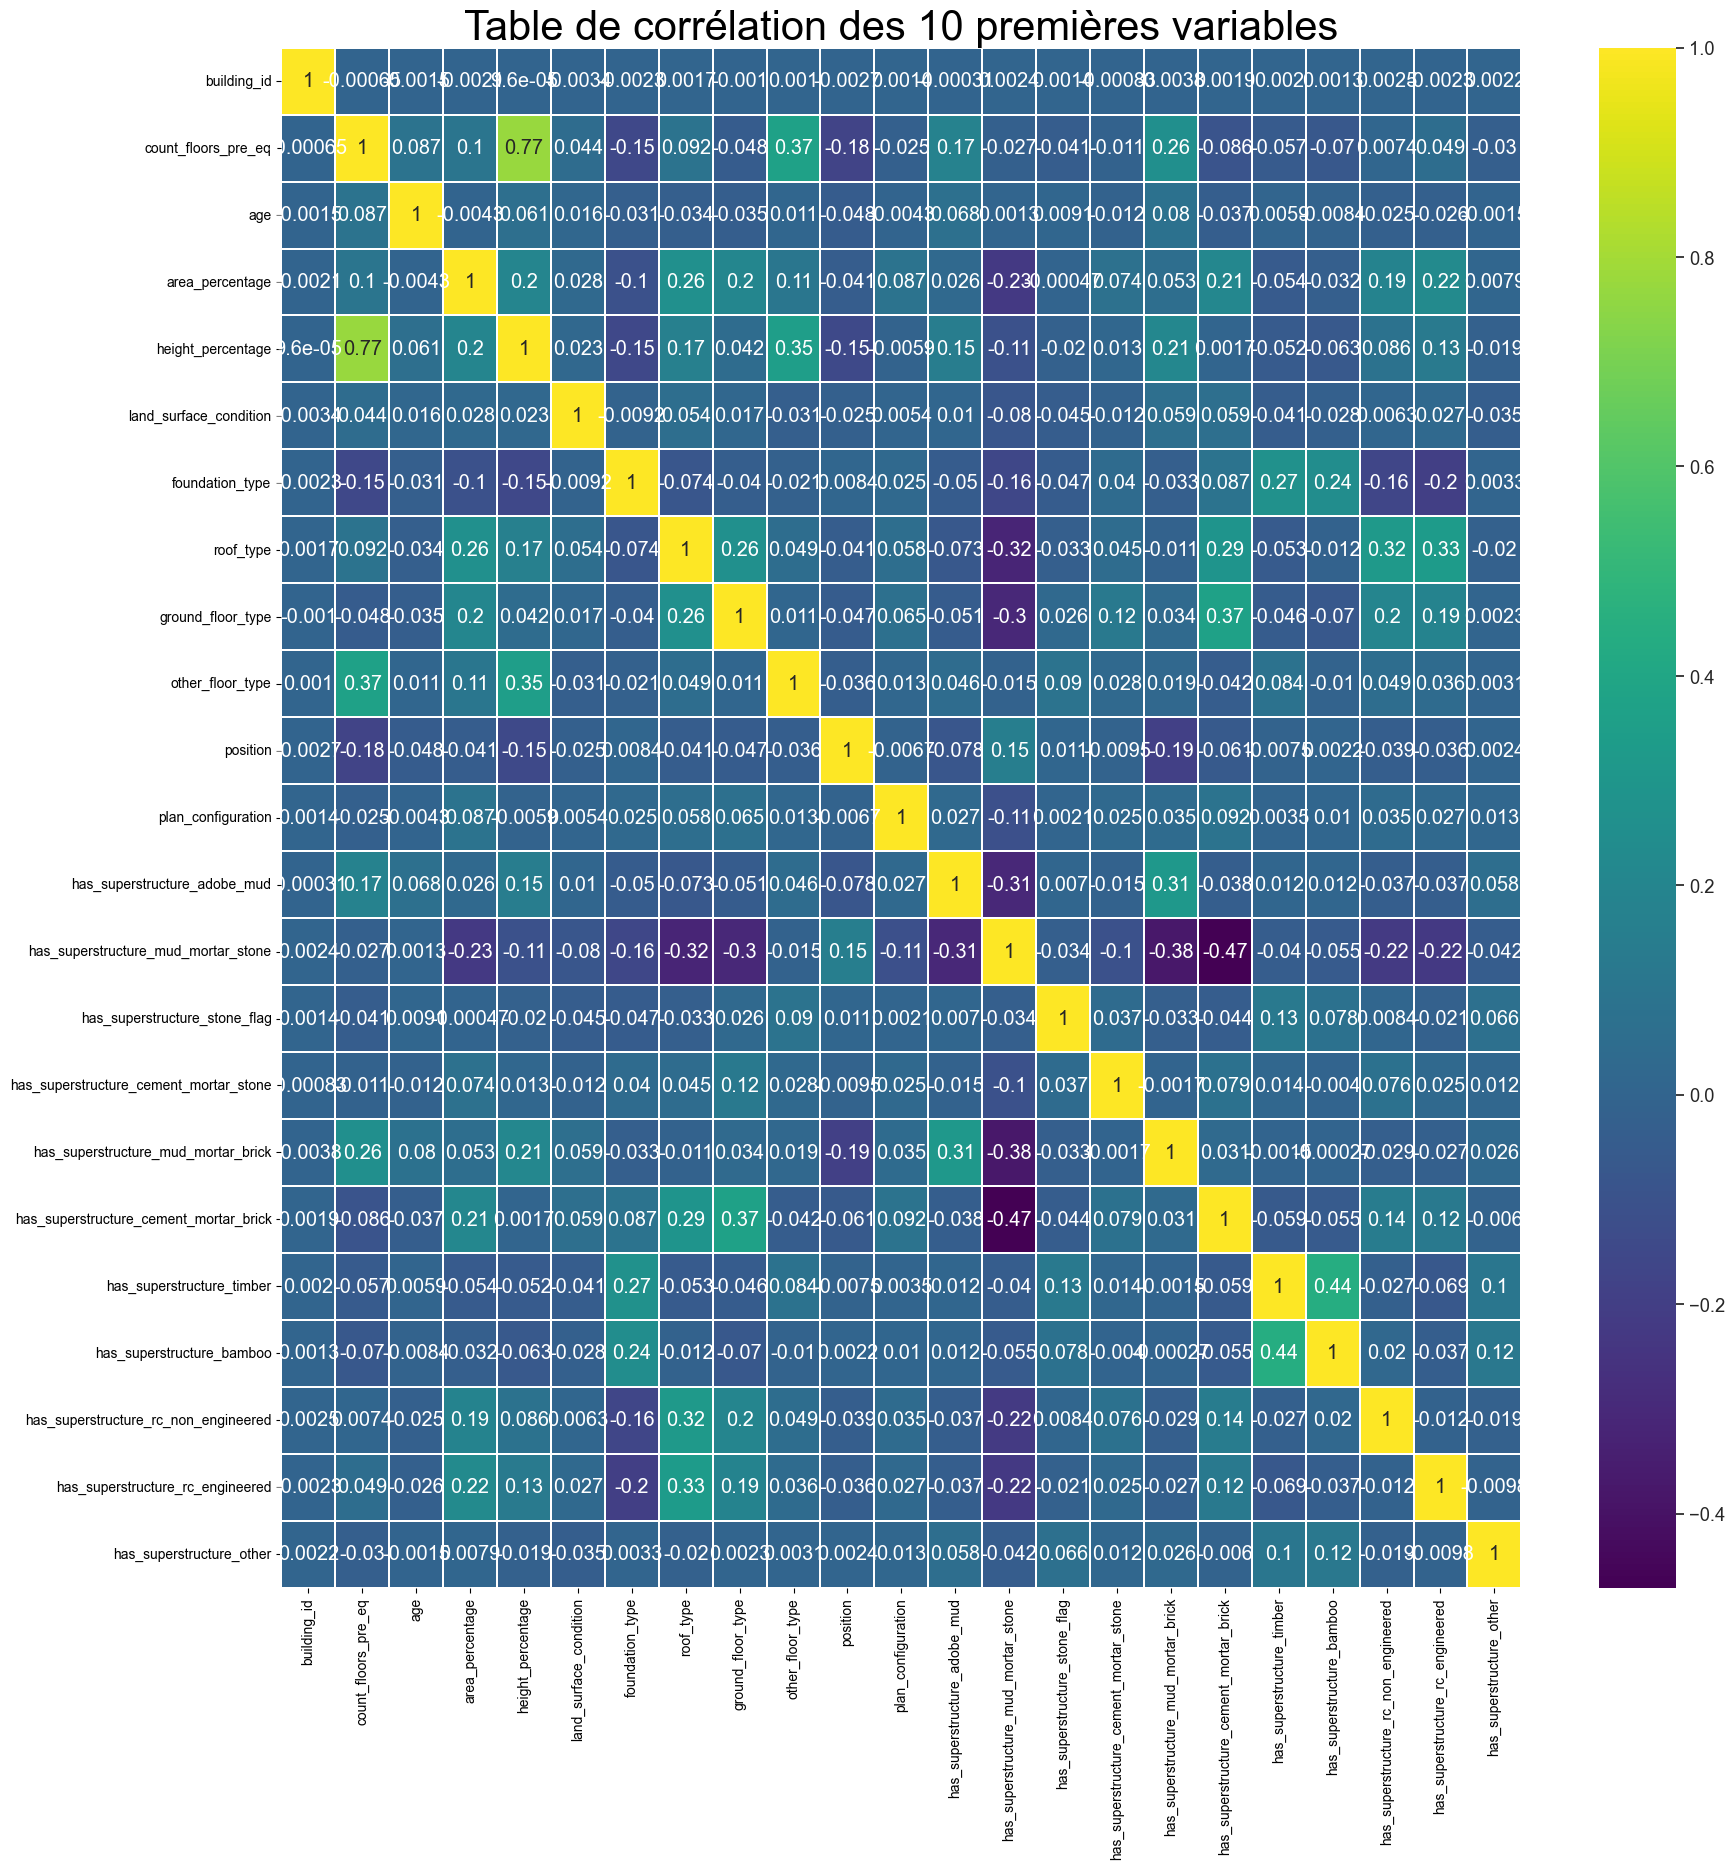

In [17]:
# graphique des correlations
plt.figure(figsize=(20, 20))

plt.title("Table de corrélation des 10 premières variables", fontsize=30)

sns.set(style="darkgrid", font_scale=1.2)
plt.xlabel("",fontsize=20)
plt.ylabel("",fontsize=20)

sns.heatmap(corr,
            cmap='viridis',
            cbar=True,
            #vmax=1.0, vmin=-1.0,
            linewidths=0.3,
            annot=True,
            #annot_kws={"size": 8}, square=True
           );

In [18]:
X.describe()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,2.129723,26.535029,8.018051,5.434365,2.695427,3.119036,1.360482,1.492481,2.226711,...,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985
std,3.045450e+05,0.727665,73.565937,4.392231,1.918418,0.696040,0.579154,0.595595,1.028436,0.902518,...,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491
min,4.000000e+00,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,2.000000,10.000000,5.000000,4.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,2.000000,15.000000,7.000000,5.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,2.000000,30.000000,9.000000,6.000000,3.000000,3.000000,2.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,9.000000,995.000000,100.000000,32.000000,3.000000,5.000000,3.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Split des donnees Train et Test

In [19]:
from sklearn.model_selection import train_test_split

X.shape

(260601, 23)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('X_Train set:', X_train.shape)
print('X_Test set:', X_test.shape)
print('yTest set:', y_test.shape)
print('yTrain set:', y_train.shape)

X_Train set: (208480, 23)
X_Test set: (52121, 23)
yTest set: (52121,)
yTrain set: (208480,)


### Visualisation du Train et Test

Text(0.5, 1.0, 'Test set')

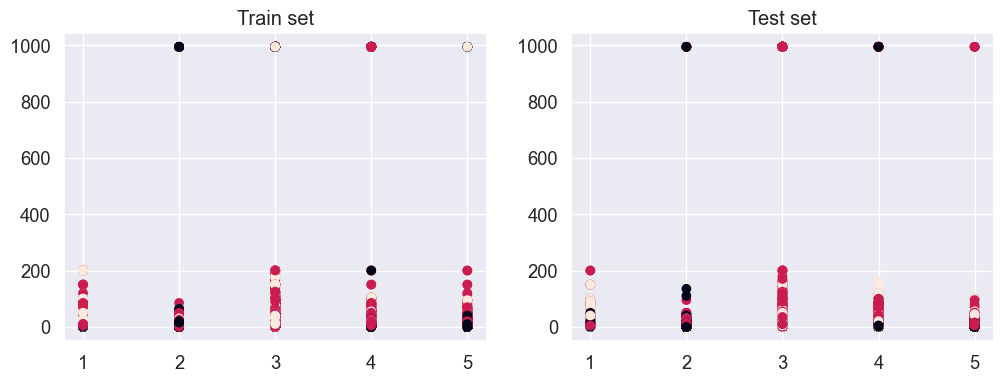

In [21]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train["foundation_type"], X_train["age"], c=y_train)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test["foundation_type"], X_test["age"],c=y_test)
plt.title('Test set')

## 1. KNN classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# déclaration de l'intention de knn
knn = KNeighborsClassifier(n_neighbors=5)

# Entrainement du modèle


# Calcul de score

# print('train score:', knn.score(X_train, y_train))
# print('test score:', knn.score(X_test, y_test))

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
# Calcul de score

print('train score:', knn.score(X_train, y_train))
print('test score:', knn.score(X_test, y_test))

KeyboardInterrupt: 

### Matrice de confusion

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_test_predit = knn.predict(X_test)

confusion_matrix(y_test, y_test_predit)

array([[ 142,  329,  171,    9],
       [  80,  815,  706,   21],
       [  29,  498, 1557,   64],
       [  11,  100,  608,  202]])

In [ ]:
y_pd = pd.DataFrame({'modalites':y})
y_pd['modalites'].value_counts()


2.0    10575
1.0     8153
3.0     4591
0.0     3388
Name: modalites, dtype: int64

In [ ]:
ytrain_pd = pd.DataFrame({'modalites':y_train})
ytrain_pd['modalites'].value_counts()

2.0    8427
1.0    6531
3.0    3670
0.0    2737
Name: modalites, dtype: int64

In [ ]:
ytest_pd = pd.DataFrame({'modalites':y_test})
ytest_pd['modalites'].value_counts()

2.0    2148
1.0    1622
3.0     921
0.0     651
Name: modalites, dtype: int64

In [ ]:
y_test_predit_pd = pd.DataFrame({'modalites':y_test_predit})
y_test_predit_pd['modalites'].value_counts()

2.0    3042
1.0    1742
3.0     296
0.0     262
Name: modalites, dtype: int64

In [ ]:
# accuracy : vrai positif + vrai negatif/total

In [ ]:
# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.54      0.22      0.31       651
         1.0       0.47      0.50      0.48      1622
         2.0       0.51      0.72      0.60      2148
         3.0       0.68      0.22      0.33       921

    accuracy                           0.51      5342
   macro avg       0.55      0.42      0.43      5342
weighted avg       0.53      0.51      0.48      5342



### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

#### Validation croisée

In [ ]:
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')


array([0.49216007, 0.5008191 , 0.49520243, 0.49754271, 0.50105312])

In [ ]:
cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy')

array([0.50982226, 0.47895229, 0.48033708, 0.49438202, 0.49344569])

In [ ]:
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

0.49735548794757783

In [ ]:
cross_val_score(knn, X_test, y_test, cv=5, scoring='accuracy').mean()

0.49138786993339706

In [ ]:
# => Le score moyen sur les 5 échantillons est de ??

## Courbe d'apprentissage

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
N, train_score, val_score = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

In [ ]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
N

array([ 1709,  3418,  5127,  6836,  8546, 10255, 11964, 13673, 15382,
       17092])

In [ ]:
val_score

array([[0.47320384, 0.47718231, 0.45869413, 0.47718231, 0.46688509],
       [0.48584133, 0.4898198 , 0.474608  , 0.48420314, 0.48069272],
       [0.48233092, 0.48513925, 0.48326703, 0.48747952, 0.49216007],
       [0.48513925, 0.49145799, 0.47952258, 0.48911772, 0.49847882],
       [0.48513925, 0.49333021, 0.48116078, 0.49379827, 0.49496841],
       [0.49216007, 0.4940323 , 0.47437398, 0.49543646, 0.49543646],
       [0.49098994, 0.49473438, 0.48607536, 0.49847882, 0.4940323 ],
       [0.4923941 , 0.49473438, 0.49028785, 0.49777674, 0.4940323 ],
       [0.49052188, 0.50035104, 0.48724549, 0.49052188, 0.49988299],
       [0.49216007, 0.5008191 , 0.49520243, 0.49754271, 0.50105312]])

In [ ]:
train_score

array([[0.51316559, 0.50321826, 0.50321826, 0.50321826, 0.50321826],
       [0.51111761, 0.51550614, 0.51550614, 0.51550614, 0.51550614],
       [0.50399844, 0.50984981, 0.50867954, 0.50867954, 0.50867954],
       [0.51316559, 0.50921592, 0.5187244 , 0.5187244 , 0.5187244 ],
       [0.51415867, 0.51684999, 0.51731804, 0.51977533, 0.51977533],
       [0.51867382, 0.51477328, 0.51896636, 0.5185763 , 0.5185763 ],
       [0.52006018, 0.51696757, 0.51889   , 0.51554664, 0.51554664],
       [0.51905215, 0.51715059, 0.51590726, 0.51905215, 0.51700432],
       [0.52171369, 0.52158367, 0.51917826, 0.52197374, 0.52255884],
       [0.52188158, 0.5177861 , 0.52176457, 0.51924877, 0.5203019 ]])

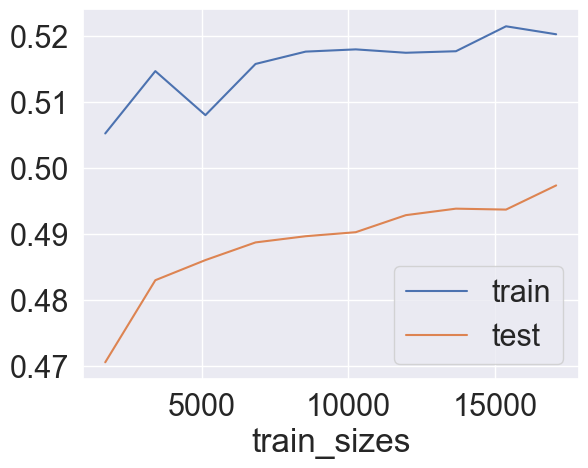

In [ ]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='test')
plt.xlabel('train_sizes')
plt.legend()

### Determiner le K optimal

Le K optimal est : 49


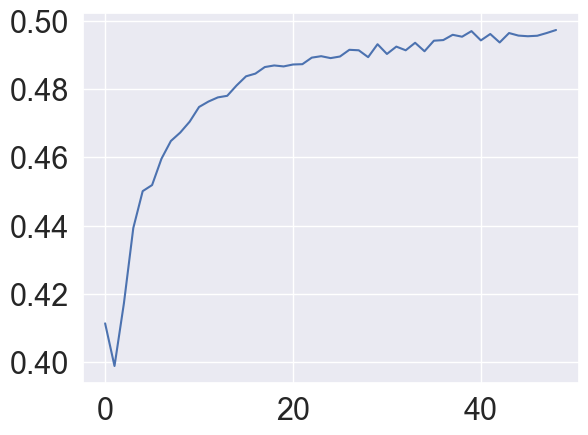

In [ ]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# Trouver le K optimal
best_k = np.argmax(val_score) + 1
print("Le K optimal est :", best_k)

## 2. Forêt aléatoire classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
# Entrainement du modèle
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Calcul de score

print('train score:', rf.score(X_train, y_train))
print('test score:', rf.score(X_test, y_test))

train score: 0.9965831968172244
test score: 0.5089853987270685


In [ ]:
y_test_rf_predit = rf.predict(X_test)

confusion_matrix(y_test, y_test_rf_predit)

array([[ 210,  285,  130,   26],
       [ 147,  761,  658,   56],
       [  65,  485, 1410,  188],
       [  18,   98,  467,  338]])

In [ ]:
# calcul de la précision, du rappel et du F-score
print(classification_report(y_test, y_test_rf_predit))

              precision    recall  f1-score   support

         0.0       0.48      0.32      0.38       651
         1.0       0.47      0.47      0.47      1622
         2.0       0.53      0.66      0.59      2148
         3.0       0.56      0.37      0.44       921

    accuracy                           0.51      5342
   macro avg       0.51      0.45      0.47      5342
weighted avg       0.51      0.51      0.50      5342



In [ ]:
N_rf, train_score_rf, val_score_rf = learning_curve(rf, X_train, y_train, 
                                                    train_sizes=np.linspace(0.1, 1, 10),
                                                    cv=5, scoring='accuracy')

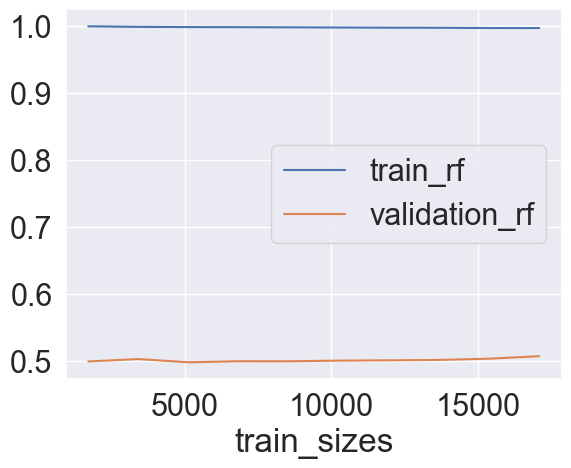

In [ ]:
plt.plot(N_rf, train_score_rf.mean(axis=1), label='train_rf')
plt.plot(N_rf, val_score_rf.mean(axis=1), label='validation_rf')
plt.xlabel('train_sizes')
plt.legend()

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

array([0.52351978, 0.50105312, 0.50620173, 0.50386146, 0.50105312])

In [ ]:
cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy').mean()

0.5071378422653872

In [ ]:
cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy').mean()

0.4876432522957154

### Quelles sont les variables importantes dans la création de la forêt aléatoire

<AxesSubplot: >

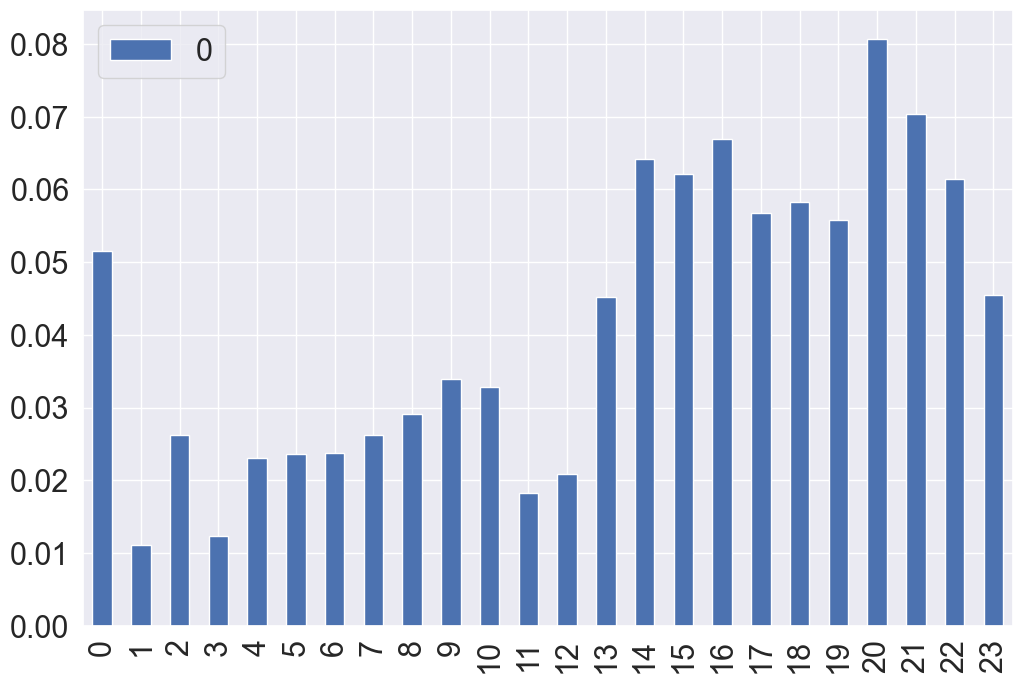

In [ ]:
pd.DataFrame(rf.feature_importances_).plot.bar(figsize=(12, 8))

## 3. La régression linéaire

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# modèles

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)


mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)

In [ ]:
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
mse du train 0.4605580459052238  et test 20007300621374.78
L'erreur quadratique moyenne du train est 0.6786442705167589  et test est 4472952.114809053
le score R2 du train est 0.4502068043844665  et test est -24312957230152.04




## 4. Forêt aléatoire régression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor(max_depth=2, random_state=0)
# Entrainement du modèle
rfg.fit(X_train, y_train)
# Evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfg.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfg.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfg.predict(X_test))))

Mean Absolute Error: 0.6664100355216521
Mean Squared Error: 0.6486235044698654
Root Mean Squared Error: 0.8053716561127945


## 5. Arbre de décision régression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
# Entrainement du modèle
dt.fit(X_train, y_train)
# Evaluation
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt.predict(X_test))))

Mean Absolute Error: 0.7773617870959689
Mean Squared Error: 1.1672490536211988
Root Mean Squared Error: 1.080393008872789


# Prédiction

In [ ]:
# Création de la fonction
def appli(model, Pregnancies = 2, Glucose = 100, BloodPressure = 60, 
          SkinThickness = 30, Insulin = 0,
                BMI = 25, DiabetesPedigreeFunction = 0.5, Age = 40):
  x = np.array([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                BMI, DiabetesPedigreeFunction, Age]).reshape(1, 8)
  print(model.predict(x))
  print(model.predict_proba(x))

In [ ]:
appli(dt,Pregnancies = 1, Glucose = 120, BloodPressure = 70, 
          SkinThickness = 10, Insulin = 2,
                BMI = 35, DiabetesPedigreeFunction = 0.2, Age = 25)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 24 features as input.

## Application aux différents modèles

In [ ]:
appli(rf)

In [ ]:
appli(knn)

In [ ]:
appli(linreg)

In [ ]:
appli(rfg)

In [ ]:
appli(dt)

## Score d'appétence 

In [ ]:
rf.predict_proba(X_test)

In [ ]:
knn.predict_proba(X_test)

In [ ]:
linreg.predict_proba(X_test)

In [ ]:
rfg.predict_proba(X_test)

In [ ]:
dt.predict_proba(X_test)